# Web3 Token Transfer Analysis Assignment

Analyze token transfer data to identify wallet behaviors, token usage trends, and transaction volumes using Pandas and NumPy.

## 1. Data Preparation

Load the dataset from CSV or simulate random data if not available. Parse the timestamp column as datetime.

In [20]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_csv("web3_token_transfers.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


## 2. Basic Exploration

Show top 5 and bottom 5 rows, count unique wallets, and transactions per token.

In [41]:
print("Top 5 rows:")
display(df.head())
print("Bottom 5 rows:")
display(df.tail())

unique_wallets = pd.unique(df[['sender_wallet', 'receiver_wallet']].values.ravel())
print("Number of unique wallets:", len(unique_wallets))

token_tx_counts = df['token'].value_counts()
print("Transactions per token:\n", token_tx_counts.to_dict())

Top 5 rows:


,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,day,amount_tag,is_large_tx,token_price,amount_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71,2024-07-27,medium,0,8.0,1877.04
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32,2024-07-14,high,1,NaN,NaN
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63,2024-07-29,medium,0,NaN,NaN
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04,2024-07-20,medium,0,8.0,3651.76
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60,2024-07-13,low,0,NaN,NaN


Bottom 5 rows:


,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,day,amount_tag,is_large_tx,token_price,amount_usd
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63,2024-07-19,low,0,NaN,NaN
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24,2024-07-06,high,1,NaN,NaN
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28,2024-07-29,low,0,NaN,NaN
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24,2024-07-27,high,1,NaN,NaN
999,0xb21913e7f083654695aeeab90f1510468f1dc41e,0x9bca5940e7d53f22ca22245954f66ece9ab16af8,USDC,295.30,2024-07-21 23:44:32,37905,9.94,2024-07-21,medium,0,NaN,NaN


Number of unique wallets: 2000
Transactions per token:
 {'WBTC': 214, 'ETH': 203, 'USDC': 200, 'UNI': 194, 'DAI': 189}


## 3. Wallet Analysis

Compute total sent/received, top 5 wallets by sent, and net flow.

In [32]:
sent = df.groupby('sender_wallet')['amount'].sum().rename('total_sent')
received = df.groupby('receiver_wallet')['amount'].sum().rename('total_received')
wallets = pd.DataFrame({'total_sent': sent, 'total_received': received}).fillna(0)
wallets['net_flow'] = wallets['total_received'] - wallets['total_sent']

print("Top 5 wallets by total sent:")
display(wallets.sort_values('total_sent', ascending=False).head(5))

Top 5 wallets by total sent:


,total_sent,total_received,net_flow
0xd538f9c05ec121d00f70a00aa58b4ea2b7339a54,4086.22,0.0,-4086.22
0x0a83fcafb15e96514ef61020d4c96714a42bd923,2884.04,0.0,-2884.04
0xcc3f561f13db4c0a50c9f71ef693cf59eef2ba25,2847.44,0.0,-2847.44
0x1172060a8e20eb50ab9194d2780e99a42c9ac008,2478.41,0.0,-2478.41
0x64182502c1b1b4d6584998fc33358956434d2dc4,2328.50,0.0,-2328.50


## 4. Token Analysis

Find average, median, std per token, token with highest volume, and plot bar chart.

Token stats:
              mean   median         std
token                                 
DAI    454.243386  316.210  456.309472
ETH    505.486502  365.730  524.465758
UNI    478.323196  305.365  497.945907
USDC   518.157150  367.185  507.707334
WBTC   473.650093  349.240  443.158188
Token with highest transaction volume: USDC


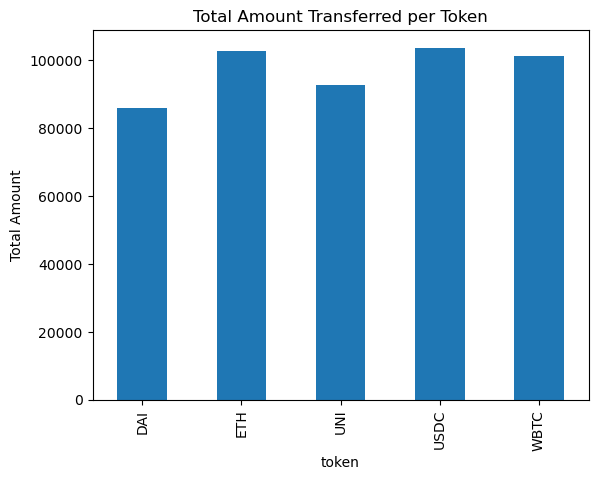

In [33]:
token_stats = df.groupby('token')['amount'].agg(['mean', 'median', 'std'])
print("Token stats:\n", token_stats)

top_token = df.groupby('token')['amount'].sum().idxmax()
print("Token with highest transaction volume:", top_token)

import matplotlib.pyplot as plt
token_volumes = df.groupby('token')['amount'].sum()
token_volumes.plot(kind='bar', title='Total Amount Transferred per Token')
plt.ylabel('Total Amount')
plt.show()

## 5. Time-based Analysis

Group by day: transactions, total volume, average size per day.

In [34]:
df['day'] = df['timestamp'].dt.date
daily_stats = df.groupby('day').agg(
    num_tx=('amount', 'count'),
    total_volume=('amount', 'sum'),
    avg_tx_size=('amount', 'mean')
)
print(daily_stats.head())

            num_tx  total_volume  avg_tx_size
day                                          
2024-07-01      28      11886.22   424.507857
2024-07-02      33      16560.16   501.823030
2024-07-03      23       8569.60   372.591304
2024-07-04      32      18195.10   568.596875
2024-07-05      34      13713.53   403.339118


## 6. Gas & Fee Analysis

Total gas per token, average fee, top 3 expensive transactions.

In [40]:
total_gas_per_token = df.groupby('token')['gas_used'].sum()
print("Total gas used per token:\n", total_gas_per_token.to_string())

avg_fee_usd = np.mean(df['tx_fee_usd'])
print("Average transaction fee (USD):", avg_fee_usd)

top3_expensive = df.nlargest(3, 'tx_fee_usd')
print("Top 3 most expensive transactions:")
display(top3_expensive)

Total gas used per token:
 token
DAI     11918034
ETH     12163737
UNI     12054799
USDC    11967216
WBTC    12930658
Average transaction fee (USD): 5.24938
Top 3 most expensive transactions:


,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,day,amount_tag,is_large_tx,token_price,amount_usd
117,0xb40ff3ae9391ca7df67ba9877a5b1ad2d2e15c5a,0xa10e3155d329183ef464cbc77795c9f3d48d26db,DAI,103.25,2024-07-27 19:37:55,61042,9.98,2024-07-27,medium,0,1.0,103.25
692,0xde9626a617067e8c9d9f5e53cf631139b4696d56,0x2d9e724bee9d687f456fcdd2a76132a7d58ada94,ETH,354.24,2024-07-21 08:41:07,25358,9.98,2024-07-21,medium,0,3200.0,1133568.00
75,0x44cb7ef9bc0528b331a9c8cbdd555eeda37cf0e4,0x53777175d6fb4679ca72b7d2486e5cefce3cdc56,UNI,652.83,2024-07-26 14:37:35,94972,9.97,2024-07-26,medium,0,8.0,5222.64


## 7. Advanced Challenges

Pivot table, tag transactions, binary feature for large tx.

In [36]:
pivot = df.pivot_table(index='token', columns='day', values='amount', aggfunc='sum', fill_value=0)
display(pivot)

def tag_amount(x):
    if x < 100:
        return 'low'
    elif x <= 1000:
        return 'medium'
    else:
        return 'high'

df['amount_tag'] = df['amount'].apply(tag_amount)
df['is_large_tx'] = np.where(df['amount'] > 1000, 1, 0)
print(df[['amount', 'amount_tag', 'is_large_tx']].head())

day,2024-07-01,2024-07-02,2024-07-03,2024-07-04,2024-07-05,2024-07-06,2024-07-07,2024-07-08,2024-07-09,2024-07-10,...,2024-07-21,2024-07-22,2024-07-23,2024-07-24,2024-07-25,2024-07-26,2024-07-27,2024-07-28,2024-07-29,2024-07-30
token,,,,,,,,,,,,,,,,,,,,,
DAI,981.03,3293.77,1098.44,1429.71,2150.39,4961.15,1459.46,2778.56,5690.08,2873.41,...,4683.88,5082.96,1274.72,5799.61,2187.39,2362.51,3811.85,5424.34,2521.41,3661.26
ETH,4437.94,3387.59,2179.93,2631.23,2163.15,1396.71,5213.51,7382.79,1054.12,4103.09,...,1324.07,2011.65,1013.46,4403.55,3904.14,1632.84,2521.84,4941.49,1868.99,3092.18
UNI,1365.56,3226.33,1139.66,4812.17,3343.93,2662.74,2526.87,4525.55,2530.37,240.37,...,1186.67,4703.19,2651.29,3757.96,4080.85,4372.96,4908.37,4156.40,2501.23,4340.96
USDC,3315.54,4156.94,2153.10,5980.24,4019.92,3759.70,4501.74,1489.73,2647.31,3573.40,...,5045.03,3625.93,5466.10,3349.96,2314.46,1959.97,4458.44,3199.36,978.38,2464.37
WBTC,1786.15,2495.53,1998.47,3341.75,2036.14,3661.97,3547.89,4055.82,3585.88,935.94,...,7192.64,6496.35,6356.13,4042.02,4023.45,712.79,3548.41,5095.99,6346.91,5295.82


    amount amount_tag  is_large_tx
0   234.63     medium            0
1  1505.06       high            1
2   658.37     medium            0
3   456.47     medium            0
4    84.81        low            0


## 8. Bonus (Optional)

Merge with token prices, add amount_usd, recalculate top tokens by USD volume.

In [ ]:
if 'token_price' in df.columns:
    df = df.drop(columns=['token_price'])

token_prices = pd.DataFrame({
    'token': ['ETH', 'USDT', 'DAI', 'UNI', 'LINK'],
    'token_price': [3200, 1, 1, 8, 25]
})
df = df.merge(token_prices, on='token', how='left')
df['amount_usd'] = df['amount'] * df['token_price']

top_tokens_usd = df.groupby('token')['amount_usd'].sum().sort_values(ascending=False)
print("Top tokens by USD volume:\n", top_tokens_usd.to_dict())

Top tokens by USD volume:
 {'ETH': 328364032.0, 'UNI': 742357.6, 'DAI': 85852.0, 'USDC': 0.0, 'WBTC': 0.0}


# The End of Assignment 3